Violeta García

<img style="float: left; margin: 15px 15px 15px 15px;" src="http://www.unionjalisco.mx/sites/default/files/styles/galeria/public/field/image/iteso_3_1.jpg?itok=M6pp1pEQ" width="180" height="50" />

# Simulación de Procesos Financieros

## <font color= blue > Tarea V 
    Optimizar Codigo


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt 
#from functools import reduce

## Ejemplo

Analicemos el ejemplo básico del apostador.

Referencia:
- https://pythonprogramming.net/monte-carlo-simulator-python/

Supongamos que estamos en un casino especial, donde el usuario puede tirar un *dado metafórico* que puede dar como resultado un número del uno (1) al número cien (100).

Si el usuario tira cualquier número entre 1 y 50, el casino gana. Si el usuario tira cualquier número entre 51 y 99, el usuario gana. Si el usuario tira 100, pierde.

Con esto, el casino mantiene un margen del 1%, el cual es mucho más pequeño que el margen típico en casinos, al igual que el margen de mercado cuando se incorporan costos por transacción.

Por ejemplo, [Scottrade](https://www.scottrade.com/) cobra \$7 USD por transacción. Si se invierten \$1000 USD por acción, esto significa que tienes que pagar \$7 USD para entrar, y \$7 USD para salir, para un total de \$14 USD.

Esto pone el margen en <font color ='red'> $1.4\%$ </font>. Esto significa, que a largo plazo, las ganancias tienen que ser mayores a $1.4\%$ en promedio, de otra manera se estará perdiendo dinero. 

De nuevo, con nuestro ejemplo en mente, 1-50, la casa gana. 51-99 el usuario gana. Un 100 significa que la casa gana.

Ahora, comencemos. Primero tenemos que crear nuestro dado.

In [2]:
# Crear una función para que devuelva simplemente ganar(true) o perder(false)
def tirar_dado():
    dado = random.randint(1,100)
    if dado<= 50 or dado == 100:
        return False
    else: 
        return True 

In [3]:
ans = list(map(lambda x: tirar_dado(), range(10)))
print(ans)

[False, False, True, False, True, False, False, False, False, True]


Ahora, necesitamos crear un **apostador**. Empezaremos con uno extremadamente básico por ahora. Veremos, que aún con un apostador muy básico, veremos cosas muy reveladoras usando un simulador montecarlo.

In [4]:
# Crearemos un apostador simple. Las caracterísitcas son: se empieza con un capital inicial,
# siempre se apuesta lo mismo, y se va a apostar un número determinado de veces.
def apostador(cap_inicial, apuesta, n_apuestas):
    n = np.arange(n_apuestas)
    global cap
    cap = np.zeros(n_apuestas)
    cap[0] = cap_inicial
    
    global profit
    profit = list(map((lambda i: apuesta if tirar_dado() else - apuesta), n))
    
    def changes(i):
        cap[i] = cap[i-1]+profit[i]
        
    temp = list(map(lambda i: changes(i), range(1,n_apuestas)))
    return cap


In [5]:
cIn = 1000 #Capital Inicial
aps = 10 #Apuesta (lo que se gana o se pierde)
nAp = 10 #Numero de apuestas
ans = apostador(cIn, aps, nAp) #Answer
print(ans)
capital = ans[-1]
print(capital) #Capital final

[1000. 1010. 1020. 1010. 1020. 1010. 1000. 1010. 1020. 1030.]
1030.0


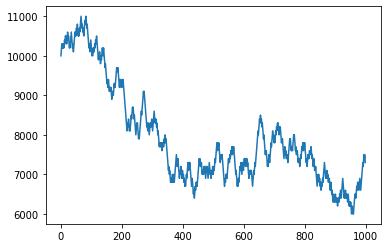

In [6]:
# Ver como evolucionan los fondos de nuestro apostador al jugar 1000 veces
# %matplotlib inline
capital= apostador(10000, 100, 1000)
plt.plot(capital)
plt.show()

9100.0
2500.0


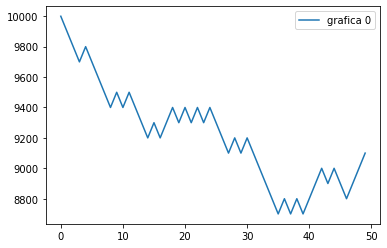

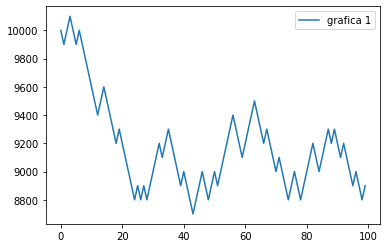

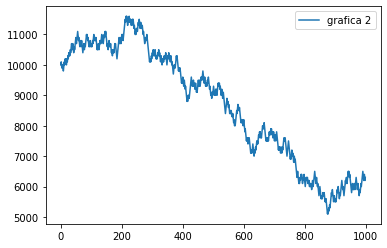

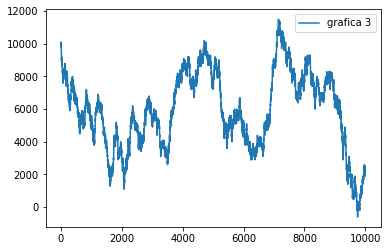

In [7]:
capital = 10000 
apuesta = 100
nAp = [50, 100, 1000, 10000]
#nAp = [5, 10, 20]
ans = list(map(lambda i: (apostador(capital, apuesta, i)), nAp))
respuesta = np.asarray(ans)

def grafica(i, dato):
    plt.figure(i)
    plt.plot(dato,label= 'grafica %i' %i)
    plt.legend()
    
temp = list(map(lambda i: grafica(i, respuesta[i]), range(int(len(nAp))) ))

print(np.mean(respuesta[0][-1]))
print(respuesta[int(len(nAp))-1][-1])

> Graficar dos histogramas para ver el comportamiento de los fondos para 1000 y 10000 juegos distintos, en donde cada juego se apuesta exactamente 1000 veces, cada apuesta es de `$100` y se inicia con un capital inicial de `$10.000`.

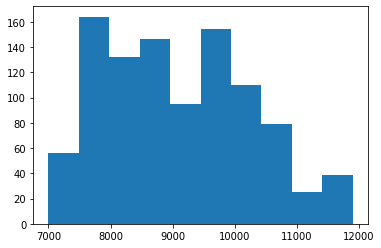

9088.0


In [8]:
# Graficar histograma para ver el comportamiento del de los fondos para 1000 juegos distintos
ans = apostador(10000, 100, 1000)
plt.hist(ans,10)
plt.show()
print(np.mean(ans))

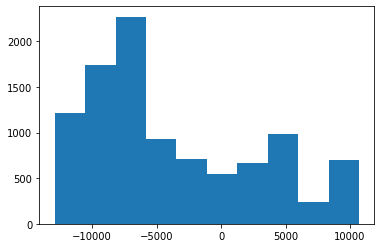

-3764.78


In [9]:
# Graficar histograma pero ahora 10,000
ans = apostador(10000, 100, 10000)
plt.hist(ans,10)
plt.show()
print(np.mean(ans))

### Es posible concluir lo siguiente: debido a que se tiene un 49% de probabilidad de ganar, mientras que el resto (51%) de perder, a corto plazo es posible generar una ganacia con el capital que se tenga, sin embargo cuando se ha simulado mas de mil veces es evidente que esa ventaja que tiene "la casa" en este juego de casino hará que ellos terminen ganado, y el jugador al tener quizas "una buena racha" al principio querra seguir intentandolo, pero en este ultimo histograma se puede ver que terminaras perdiendo todo tu capital ya que esa diferencia si es significativa, en especial a largo plazo